In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from joblib import load

In [2]:
# 加载数据
data = pd.read_csv('covtype.data', header=None)

In [3]:
# 最后一列为'Cover_Type'即目标变量，其余列为特征
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]   # 目标变量

In [4]:
# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 特征缩放
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 使用随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# 定量特征名称
quantitative_features = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Wilderness_Area 的二进制列名称
wilderness_area_columns = [
    f'Wilderness_Area_{i}' for i in range(1, 5)
]

# Soil_Type 的二进制列名称
soil_type_columns = [
    f'Soil_Type_{i}' for i in range(1, 41)
]

# Cover_Type 的分类名称
cover_type_labels = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

# 合并所有特征名称
all_feature_names = quantitative_features + wilderness_area_columns + soil_type_columns

# 打印特征名称列表以验证
print(all_feature_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40']


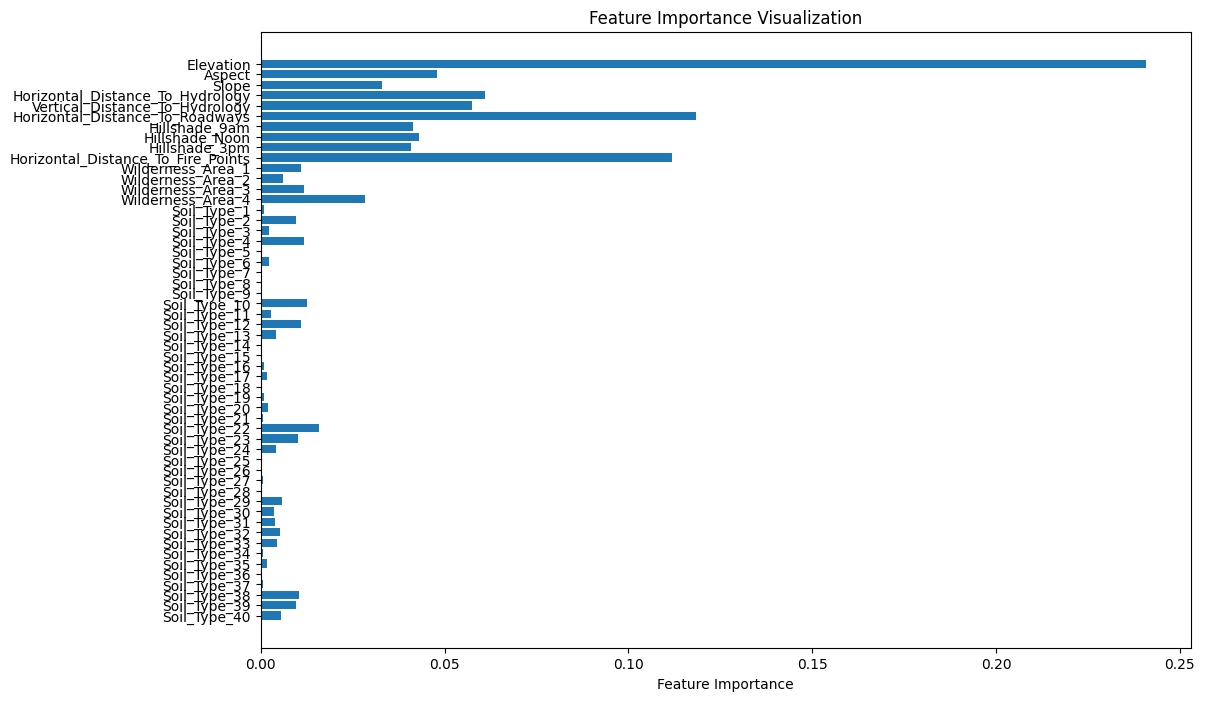

In [8]:
# 获取特征重要性
feature_importances = clf.feature_importances_

# 创建一个条形图来可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(range(len(all_feature_names)), feature_importances, align='center')
plt.yticks(range(len(all_feature_names)), all_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Visualization')

# 翻转y轴，使特征名称从上至下阅读
plt.gca().invert_yaxis()

# 显示图表
plt.show()

In [9]:
#dump(clf, 'trained_model.joblib')  # 将模型保存

In [10]:
# 预测
#clf = load('trained_model.joblib')
y_pred = clf.predict(X_test)

In [11]:
# 评估模型
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9551388518368716

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [12]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

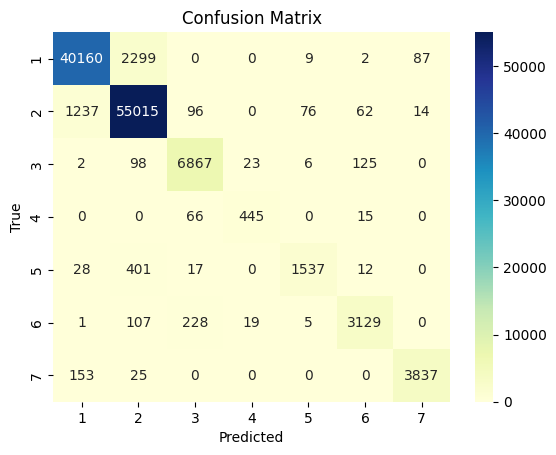

In [15]:
# 绘制混淆矩阵
import numpy as np
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.arange(1, 8), yticklabels=np.arange(1, 8))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()